<a href="https://colab.research.google.com/github/MartinVIllesca/Ramos-Redes/blob/master/taller%20de%20proyecto/stanford-dogs-keras-vgg16(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: ignored

In [4]:
#-------Import Dependencies-------#
%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn


from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom
# from scipy.ndimage import imread


from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.xception import Xception
from keras.applications.nasnet import NASNetMobile
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

Using TensorFlow backend.


In [0]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [0]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [0]:
# chihuahua_dir = '../input/images/Images/n02085620-Chihuahua'
# japanese_spaniel_dir = '../input/images/Images/n02085782-Japanese_spaniel'
# maltese_dir = '../input/images/Images/n02085936-Maltese_dog'
# pekinese_dir = '../input/images/Images/n02086079-Pekinese'
# shitzu_dir = '../input/images/Images/n02086240-Shih-Tzu'
# blenheim_spaniel_dir = '../input/images/Images/n02086646-Blenheim_spaniel'
# papillon_dir = '../input/images/Images/n02086910-papillon'
# toy_terrier_dir = '../input/images/Images/n02087046-toy_terrier'
# afghan_hound_dir = '../input/images/Images/n02088094-Afghan_hound'
# basset_dir = '../input/images/Images/n02088238-basset'

cardigan_dir = '/content/drive/My Drive/data_EL5003/test_img/cardigan'
pug_dir = '/content/drive/My Drive/data_EL5003/test_img/pug'
samoyed_dir = '/content/drive/My Drive/data_EL5003/test_img/samoyed'
toy_terrier_dir = '/content/drive/My Drive/data_EL5003/test_img/toy_terrier'

X = []
Z = []
imgsize = 150

In [21]:
# training_data('chihuahua',chihuahua_dir)
# training_data('japanese_spaniel',japanese_spaniel_dir)
# training_data('maltese',maltese_dir)
# training_data('pekinese',pekinese_dir)
# training_data('shitzu',shitzu_dir)
# training_data('blenheim_spaniel',blenheim_spaniel_dir)
# training_data('papillon',papillon_dir)
# training_data('toy_terrier',toy_terrier_dir)
# training_data('afghan_hound',afghan_hound_dir)
# training_data('basset',basset_dir)
training_data('cardigan', cardigan_dir)
training_data('pug', pug_dir)
training_data('samoyed', samoyed_dir)
training_data('toy_terrier', toy_terrier_dir)

100%|██████████| 8/8 [00:00<00:00, 81.98it/s]


In [0]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,10)
X = np.array(X)
X=X/255

# x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=69)

In [0]:
# augs_gen = ImageDataGenerator(
#         featurewise_center=False,  
#         samplewise_center=False, 
#         featurewise_std_normalization=False,  
#         samplewise_std_normalization=False,  
#         zca_whitening=False,  
#         rotation_range=10,  
#         zoom_range = 0.1, 
#         width_shift_range=0.2,  
#         height_shift_range=0.2, 
#         horizontal_flip=True,  
#         vertical_flip=False) 

# augs_gen.fit(x_train)

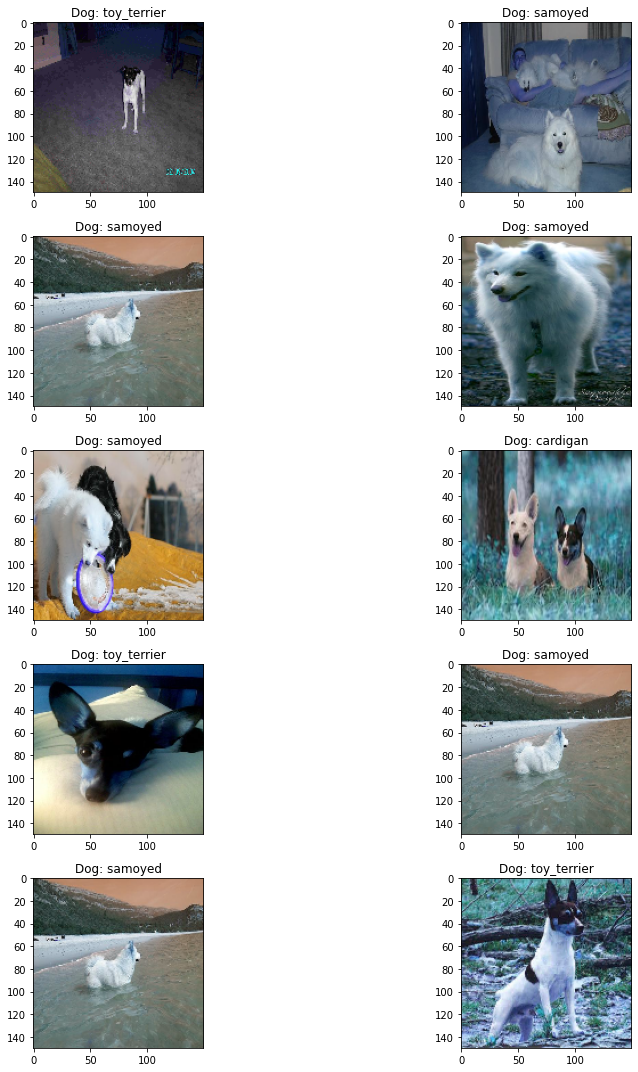

In [27]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(X))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Dog: '+Z[l])
        
plt.tight_layout()

58892288/58889256 [==============================] - 1s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f7058517550> False
<keras.layers.convolutional.Conv2D object at 0x7f70585179e8> False
<keras.layers.convolutional.Conv2D object at 0x7f7058517c50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7058517b70> False
<keras.layers.convolutional.Conv2D object at 0x7f7057cb9128> False
<keras.layers.convolutional.Conv2D object at 0x7f7057cb9f60> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7057cceb00> False
<keras.layers.convolutional.Conv2D object at 0x7f7057cce940> False
<keras.layers.convolutional.Conv2D object at 0x7f7057cd4630> False
<keras.layers.convolutional.Conv2D object at 0x7f7057cd4dd8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7057cd7c50> False
<keras.layers.convolutional.Conv2D object at 0x7f7057cd7a90> False
<keras.layers.convolutional.Conv2D object at 0x7f70522516d8> False
<keras.layers.convolutional.Conv2D object at 0x7f7052258358> F

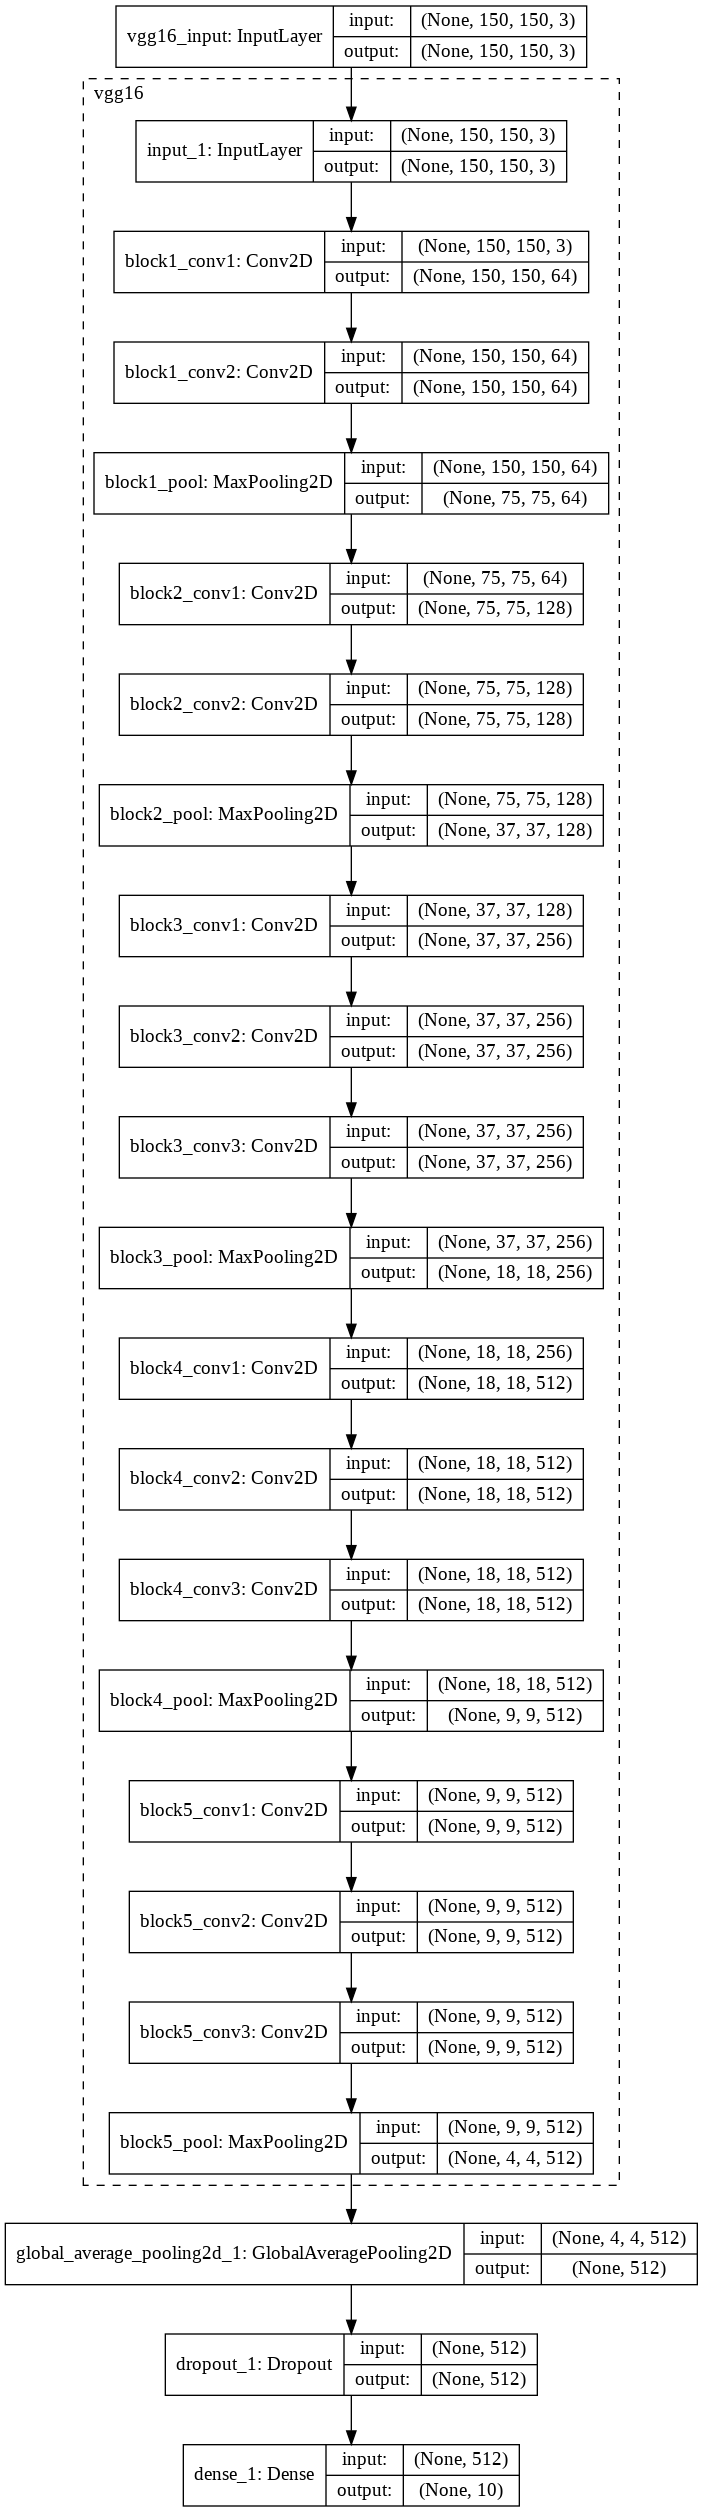

In [5]:
base_model = VGG16(include_top=False,
                  input_shape = (150,150,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [0]:
# checkpoint = ModelCheckpoint(
#     './base.model',
#     monitor='val_loss',
#     verbose=1,
#     save_best_only=True,
#     mode='min',
#     save_weights_only=False,
#     period=1
# )
# earlystop = EarlyStopping(
#     monitor='val_loss',
#     min_delta=0.001,
#     patience=30,
#     verbose=1,
#     mode='auto'
# )
# tensorboard = TensorBoard(
#     log_dir = './logs',
#     histogram_freq=0,
#     batch_size=16,
#     write_graph=True,
#     write_grads=True,
#     write_images=False,
# )

# csvlogger = CSVLogger(
#     filename= "training_csv.log",
#     separator = ",",
#     append = False
# )

# reduce = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.1,
#     patience=3,
#     verbose=1, 
#     mode='auto'
# )

# callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [0]:
#-----------Optimizers-----------#
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=1e-2)
#----------Compile---------------#
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [0]:
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# !unzip ngrok-stable-linux-amd64.zip
# LOG_DIR = './logs' # Here you have to put your log directory
# get_ipython().system_raw(
#     'tensorboard --logdir {} --host 0.0.0.0 --port 8080 &'
#     .format(LOG_DIR)
# )
# get_ipython().system_raw('./ngrok http 8080 &')
# ! curl -s http://localhost:4040/api/tunnels | python3 -c \
#     "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [38]:
# show_final_history(history)
model.load_weights('/content/drive/My Drive/data_EL5003/model/model.h5')
model_score = model.evaluate(X,Y)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])


30/30 [==============================] - 6s 210ms/step
Model Test Loss: 3.4407272338867188
Model Test Accuracy: 0.06666667014360428
